# LSI31003 Machine Learning in Molecular Biology Assignment 3

In [2]:
from setup import *
%matplotlib inline

In [3]:
#need to install some modules first so execute this cell
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install scikit-learn

In [4]:
from scipy.stats import *

In [11]:
#Some extra packages that are useful in this assignment
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn import decomposition
from sklearn import datasets
from scipy.stats import gaussian_kde

##  Introduction <a id='section1'></a>

In this assignment, we will explore data visualisation and density based clustering with t-SNE and K-Means . We use the same data set of somatic mutations as in assignments 1 and 2 from ["Alexandrov LB, et al. (2020) The repertoire of mutational signatures in human cancer. Nature"](https://www.nature.com/articles/s41586-020-1943-3).

In [6]:
## ploting 96 mutational channels
col_set = ['#0343df','#000000','#e50000','#929591','#3f9b0b','#ff81c0']
col_list = []
for i in range (len(col_set)):
    col_list += [col_set[i]] * 16

def plot_mutationchannels(sig, name=""):
    sns.set(rc={"figure.figsize":(11,2.5)})
    sns.set(style="whitegrid", color_codes=True)

    plt.bar(sig.index, sig, width = 0.5, color = col_list)
    plt.xticks(rotation=90, size = 7, weight='bold')
    plt.title (name, size = 12, weight='bold')
    plt.tight_layout()
    plt.show()

In [7]:
somaticMutations = pd.read_csv ("./data/MutSigCancer/WGS_PCAWG.96.csv")
somaticMutations = somaticMutations.set_index (somaticMutations['Mutation type'] + "_" + somaticMutations['Trinucleotide'])

In [8]:
somaticMutations.shape

(96, 2782)

In [9]:
somaticMutations.head()

,Mutation type,Trinucleotide,Biliary-AdenoCA::SP117655,Biliary-AdenoCA::SP117556,Biliary-AdenoCA::SP117627,Biliary-AdenoCA::SP117775,Biliary-AdenoCA::SP117332,Biliary-AdenoCA::SP117712,Biliary-AdenoCA::SP117017,Biliary-AdenoCA::SP117031,...,Uterus-AdenoCA::SP94540,Uterus-AdenoCA::SP95222,Uterus-AdenoCA::SP89389,Uterus-AdenoCA::SP90503,Uterus-AdenoCA::SP92460,Uterus-AdenoCA::SP92931,Uterus-AdenoCA::SP91265,Uterus-AdenoCA::SP89909,Uterus-AdenoCA::SP90629,Uterus-AdenoCA::SP95550
C>A_ACA,C>A,ACA,269,114,105,217,52,192,54,196,...,117,233,94,114,257,139,404,97,250,170
C>A_ACC,C>A,ACC,148,56,71,123,36,139,54,102,...,90,167,59,64,268,75,255,78,188,137
C>A_ACG,C>A,ACG,25,13,13,29,8,31,12,15,...,12,29,14,19,51,13,52,14,49,32
C>A_ACT,C>A,ACT,154,70,73,126,31,119,41,122,...,82,213,66,68,271,68,281,80,202,116
C>A_CCA,C>A,CCA,215,63,71,129,30,190,54,133,...,119,188,67,89,307,69,339,204,194,127


### Problem 1: Visualisation of cancer mutations counts with PCA and t-SNE <a id='Problem1'></a>

#### Problem 1a: 
First, normalize the 96-dimensional vectors of somatic mutations such that each sample is a probability distribution over the 96 channels. Run then a two-component principal component analysis on those vectors and plot the samples on a plane of first and second principal component. Can you see any clusters? Print out the explained variance ratio. Hint: decomposition. PCA

Explained variance ratio:  [0.27458971 0.19158286]


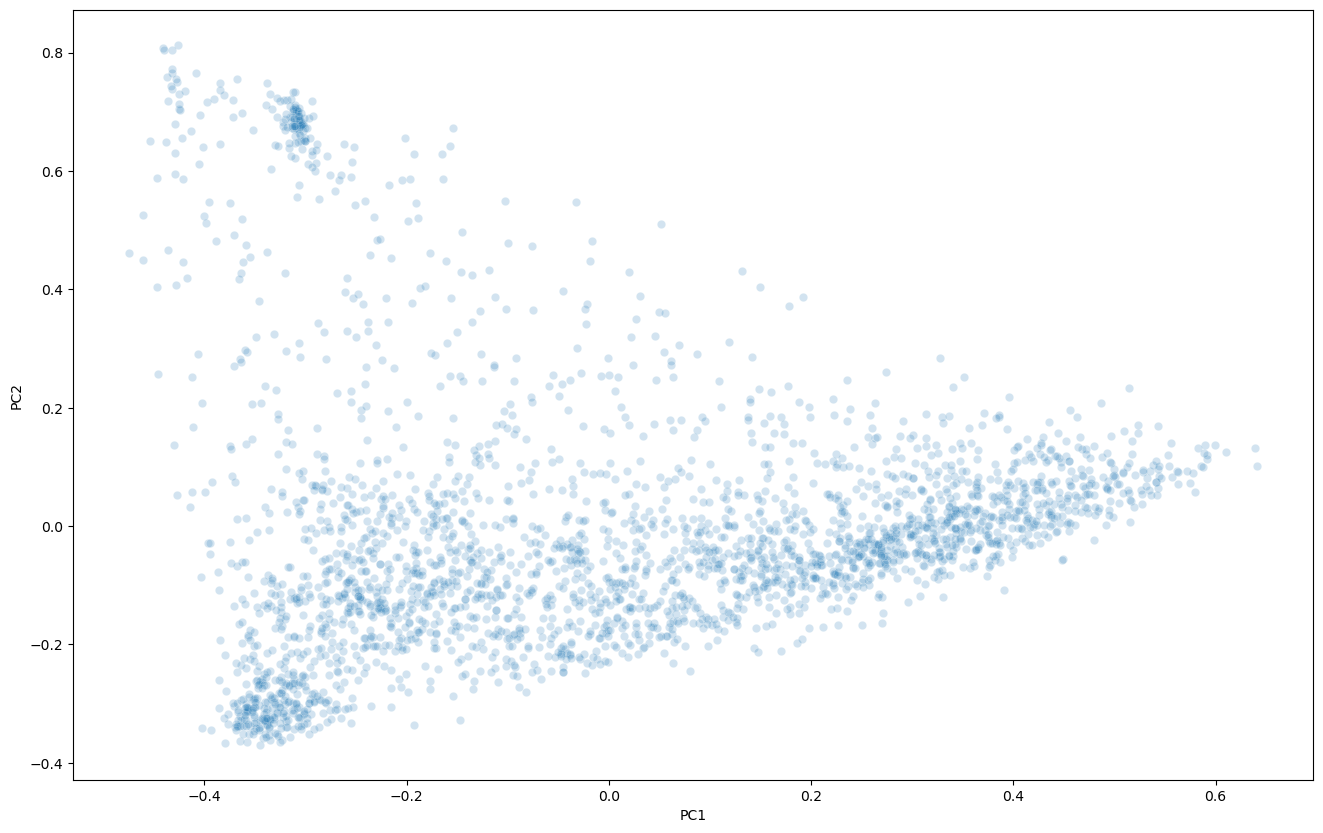

In [39]:
normalized_mutations=normalize(somaticMutations.iloc[:,2:], axis=0)

pca = PCA(n_components=2)
pca_df = pd.DataFrame(
    data    = pca.fit_transform(normalized_mutations.T),
    columns = ("PC1", "PC2")
)

print("Explained variance ratio: ",pca.explained_variance_ratio_)
# Normalization will drastically improve this plot
_, ax = plt.subplots(figsize = (16, 10))
sns.scatterplot(data = pca_df, x = "PC1", y = "PC2", alpha = 0.2, ax = ax);

Yes there is at least one visible cluster at the top left corner of the plot. Also bottom left corner could possibly be described as a cluster.

#### Problem 1b: 
Add colouring of samples by cancer type to the previous figure. That is, assign each cancer type a separate colour and plot the samples again on the plane of first two principal components. Do various cancer types show up uniformly in the map?

Hint : create a column `pca["cancer type"] = ...` and pass its name to *sns.scatterplot*'s hue parametre

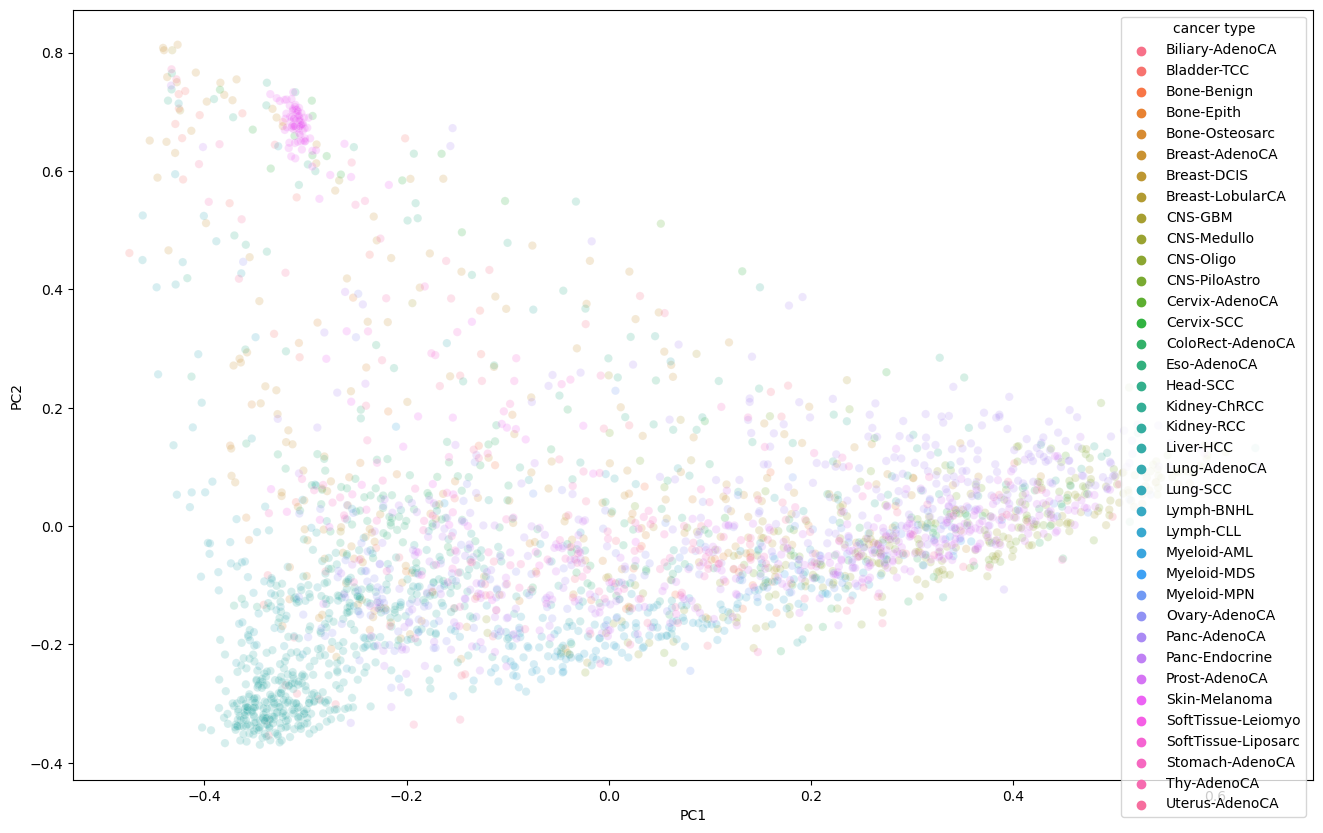

In [51]:
cancer_types=[s.split("::")[0] for s in list(somaticMutations.columns[2:])]

pca_df["cancer type"] = cancer_types

_, ax = plt.subplots(figsize = (16, 10))
sns.scatterplot(data = pca_df, x = "PC1", y = "PC2",hue="cancer type",alpha = 0.2, ax = ax);

#### Problem 1c: 
Run 2-component t-SNE with cosine metric on the 96-dimensional samples and plot the components again in 2 dimensions with the colouring by cancer type. You can use PCA as the initial state in the algorithm. Test a few values of perplexity, learning rate, and number of iterations until you find clear structure in the map, e.g. perplexity=30, n_iter=2500, learning_rate=500 is a starting point. Plot your best result. 

Hint: sklearn.manifold.TSNE . Note: The computation may take some time, even 10 minutes. 

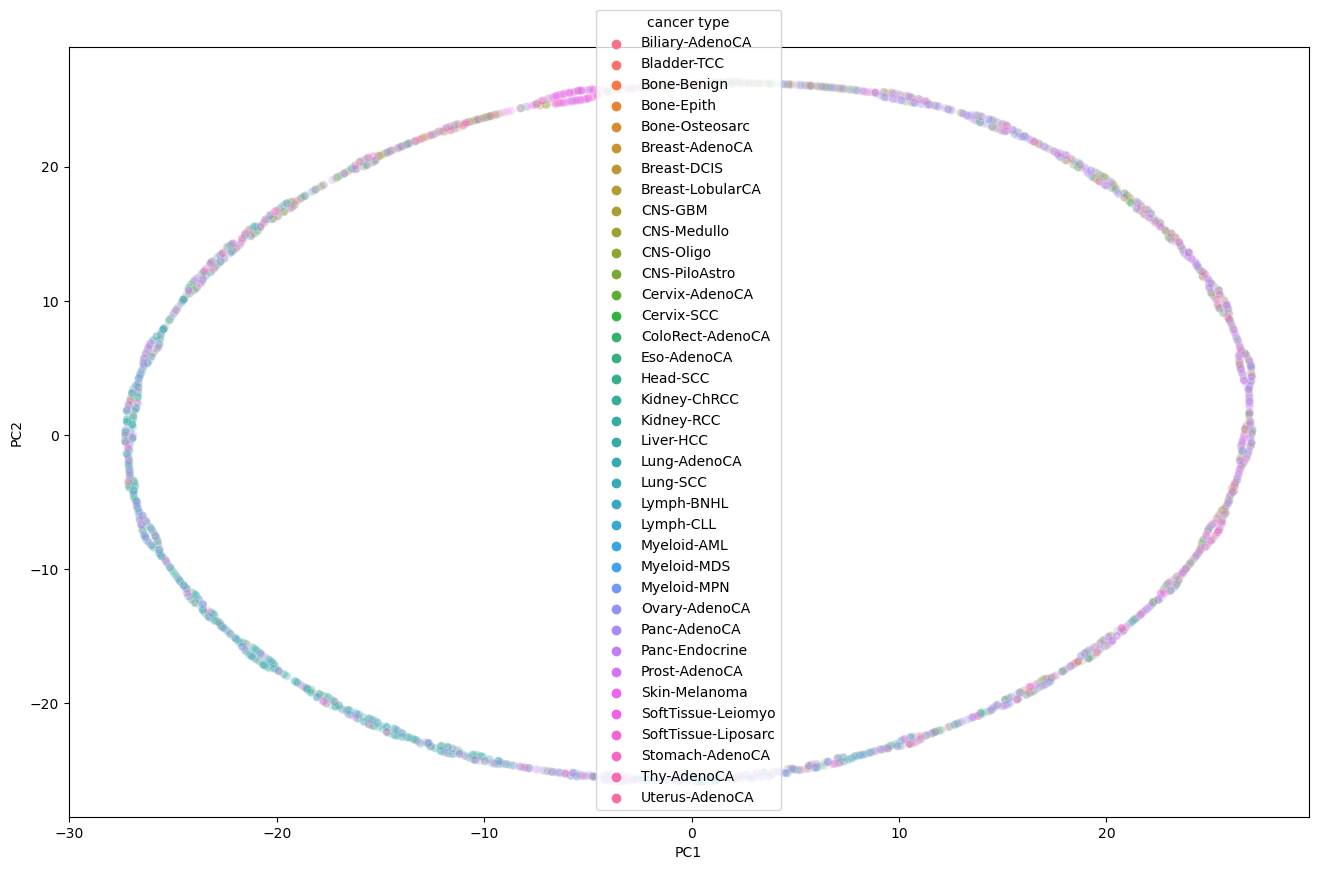

In [60]:
tsne = TSNE(n_components=2, perplexity=100, learning_rate=800, n_iter=2500, metric='cosine', random_state=42)

tsne_df = pd.DataFrame(
    data    = tsne.fit_transform(pca.fit_transform(normalized_mutations.T)),
    columns = ("PC1", "PC2")
)

tsne_df["cancer type"] = cancer_types

_, ax = plt.subplots(figsize = (16, 10))
sns.scatterplot(data = tsne_df, x = "PC1", y = "PC2",hue="cancer type",alpha = 0.2, ax = ax);

### Problem 2: Density based clustering <a id='Problem2'></a>

#### Problem 2 a: 
Plot the components of t-SNE again but with a colour coding given by the density heat map of the points (e.g. red for high and blue for low density). Plot in another figure just the points that belong to high-density areas. You can pick the threshold for 'high density' yourself such that you get clear clusters. 

Hint: 

xy = np.vstack([tsne_results[:, 0], tsne_results[:, 1]])

z = gaussian_kde(xy, 0.05)(xy)

z=z/np.max(z) 

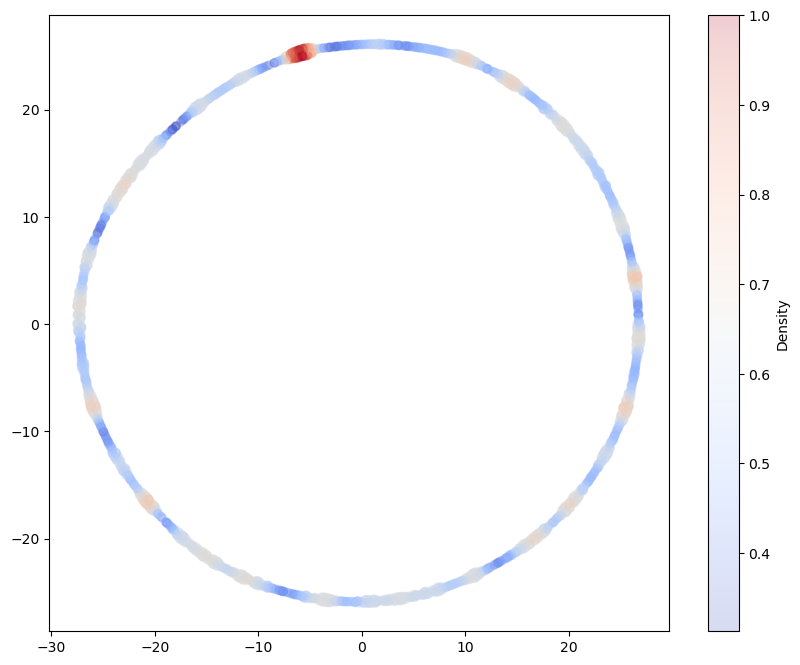

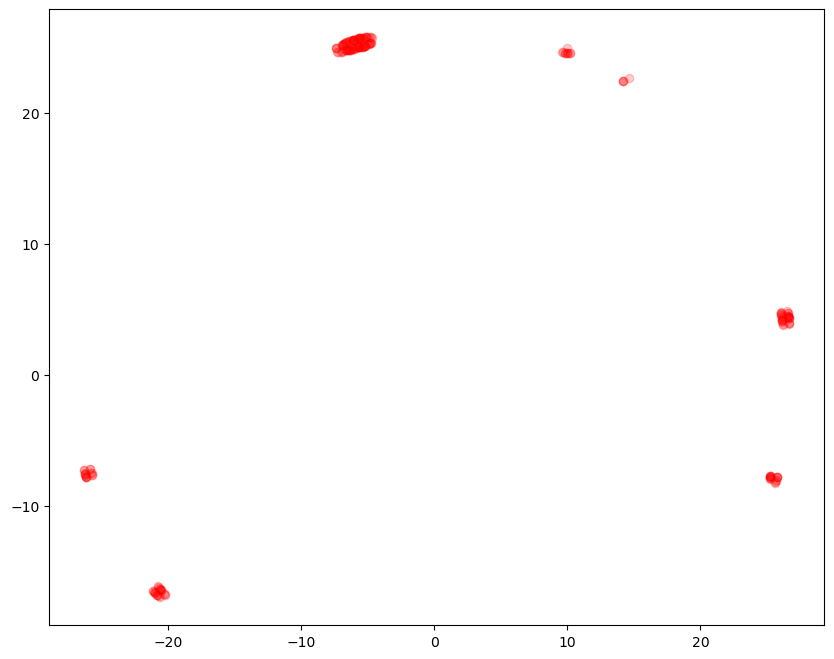

In [75]:
pca_results = pca.fit_transform(normalized_mutations.T)
tsne_results = tsne.fit_transform(pca_results)

xy = np.vstack([tsne_results[:, 0], tsne_results[:, 1]])
z = gaussian_kde(xy, 0.05)(xy)
z=z/np.max(z)

plt.figure(figsize=(10, 8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=z, cmap='coolwarm', alpha=0.2)
plt.colorbar(label='Density')

high_density_threshold = 0.7
high_density_indices = np.where(z > high_density_threshold)[0]

plt.figure(figsize=(10, 8))
plt.scatter(tsne_results[high_density_indices, 0], tsne_results[high_density_indices, 1], c='red', alpha=0.2)

#### Problem 2 b: 
Run K-means on the high density data and plot the mean profile over the 96 channels in each of these clusters. Do you see any of the signatures listed in http://cancer.sanger.ac.uk/cosmic/signatures ?

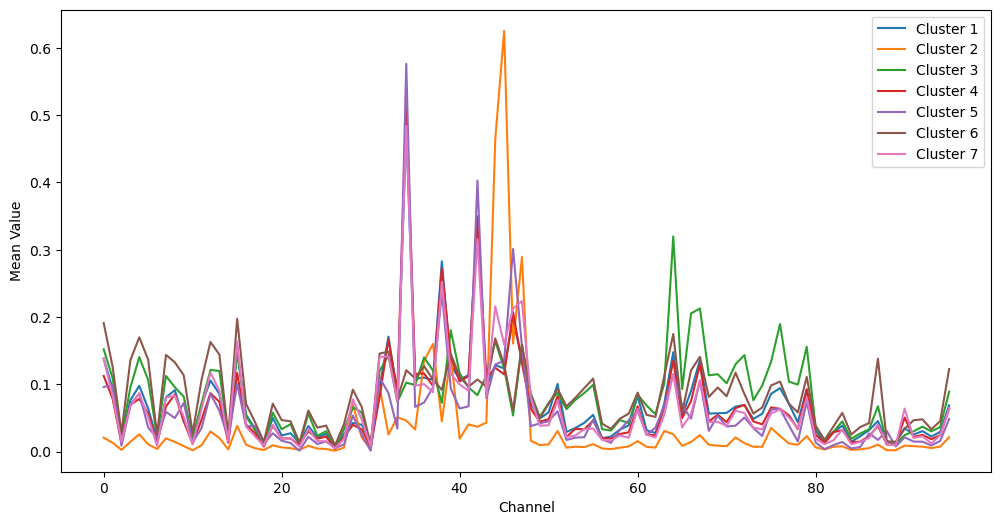

In [78]:
high_density_data = tsne_results[high_density_indices]

num_clusters = 7  
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(high_density_data)

plt.figure(figsize=(12, 6))
for cluster_label in range(num_clusters):
    cluster_data = normalized_mutations[:, high_density_indices[cluster_labels == cluster_label]]
    mean_profile = np.mean(cluster_data, axis=1)
    plt.plot(mean_profile, label=f'Cluster {cluster_label + 1}')

plt.xlabel('Channel')
plt.ylabel('Mean Value')
plt.legend()